In [52]:
import sys
sys.path.append('..')

import numpy as np
import cirq
from cirq.contrib.qasm_import import circuit_from_qasm
from cirq.contrib.svg import SVGCircuit
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

import mosaic

In [87]:
qasm_file = '../benchmarks/random/rand_8.qasm'
with open(qasm_file, 'r') as file:
    qasm_str = file.read()
circ = circuit_from_qasm(qasm_str)
circ = circ[:10]
qc = QuantumCircuit.from_qasm_str(circ.to_qasm())
circ = circ + circuit_from_qasm(qc.inverse().qasm()).all_operations()
qubits = sorted(list(circ.all_qubits()))
n = cirq.num_qubits(circ)
print('num_qubits: {}, num_gates: {}, num_2q_gates: {}, depth: {}'.format(
    n, mosaic.circuits.num_gates(circ), mosaic.circuits.num_nonlocal_gates(circ), len(circ)
))

num_qubits: 8, num_gates: 124, num_2q_gates: 36, depth: 20


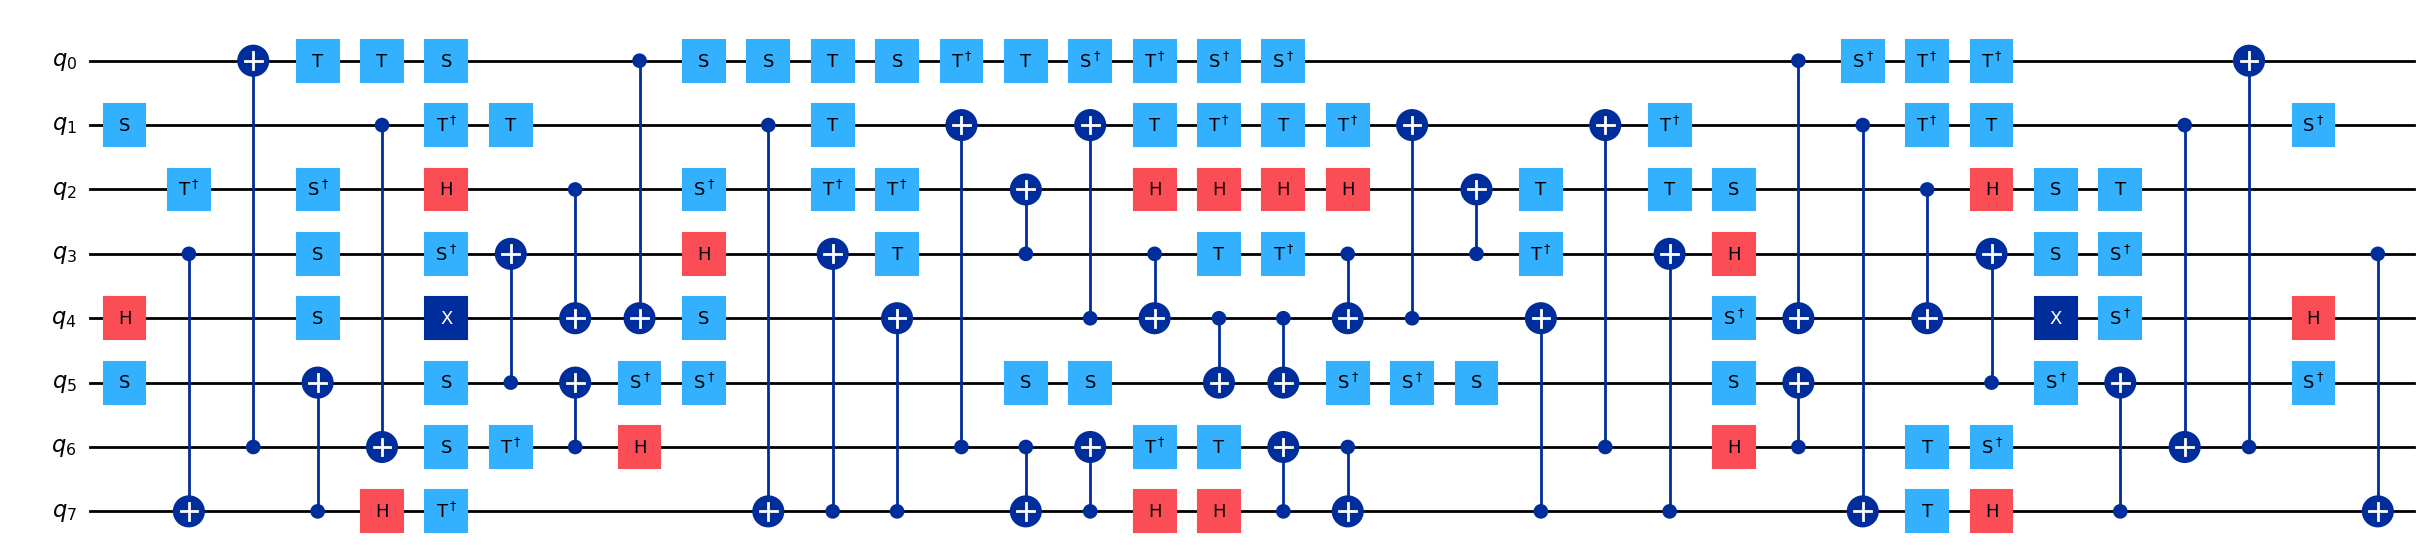

In [88]:
QuantumCircuit.from_qasm_str(circ.to_qasm()).draw('mpl', fold=100, filename='circ_rand.pdf')


In [89]:
blocks_2q = mosaic.partition.seq_partition(circ)
blocks_3q = mosaic.partition.seq_partition(circ, 3)
print(len(blocks_2q), len(blocks_3q))

32 16


In [90]:
print('num_gates={}, num_2q_gates={}'.format(mosaic.circuits.num_gates(circ), mosaic.circuits.num_nonlocal_gates(circ)))
print('2q blocks: num_blk={}'.format(len(blocks_2q)))
print('3q blocks: num_blk={}'.format(len(blocks_3q)))


num_gates=124, num_2q_gates=36
2q blocks: num_blk=32
3q blocks: num_blk=16


In [91]:
blocks_2q[2]

q_2: ───T^-1───S^-1───H───@───S^-1───T^-1───T^-1───
                          │
q_4: ───H──────S──────X───X────────────────────────

In [92]:
final_state = cirq.DensityMatrixSimulator().simulate(circ).final_density_matrix

In [100]:
final_state.diagonal().real[:20]

array([ 9.9999964e-01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -4.4703480e-08,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)